## 📌 Step 1: Import Required 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 📌 Step 2: Load the Dataset

In [2]:
df=pd.read_csv(r"C:\Users\zabiz\Downloads\ML_Models\Classification\Stacking Classifier\employee_productivity_dataset.csv")

## 📌 Step 3: View First 5 Rows of Dataset

In [3]:
df.head()

,Age,Experience_Years,Education_Level,Department,Working_Hours_Per_Week,Remote_Work_Ratio,Training_Hours,Certifications,Gender,Region,High_Performance
0,58,18,Masters,Operations,31,0.03,32,7,Female,North,0
1,48,7,PhD,IT,45,0.91,87,0,Female,West,0
2,34,12,Masters,Finance,57,0.95,83,4,Female,East,1
3,27,8,Bachelors,HR,55,0.72,19,9,Male,South,0
4,40,1,PhD,HR,32,0.75,45,5,Female,South,0


## 📌 Step 4: Check Dataset Shape

In [4]:
df.shape

(45000, 11)

## 📌 Step 5: Import Label Encoder

In [5]:
from sklearn.preprocessing import LabelEncoder

## 📌 Step 6: Apply Label Encoder

In [6]:
le = LabelEncoder()
df["Education_Level"] = pd.DataFrame(le.fit_transform(df["Education_Level"]))
df["Department"] = pd.DataFrame(le.fit_transform(df["Department"]))     
df["Gender"] = pd.DataFrame(le.fit_transform(df["Gender"]))  
df["Region"] = pd.DataFrame(le.fit_transform(df["Region"]))  

## 📌 Step 7: Check the data after Label Encoder

In [7]:
df.head()

,Age,Experience_Years,Education_Level,Department,Working_Hours_Per_Week,Remote_Work_Ratio,Training_Hours,Certifications,Gender,Region,High_Performance
0,58,18,2,3,31,0.03,32,7,0,1,0
1,48,7,3,2,45,0.91,87,0,0,3,0
2,34,12,2,0,57,0.95,83,4,0,0,1
3,27,8,0,1,55,0.72,19,9,1,2,0
4,40,1,3,1,32,0.75,45,5,0,2,0


## 📌 Step 8: Check Missing Values in Dataset

In [8]:
df.isnull().sum()

Age                       0
Experience_Years          0
Education_Level           0
Department                0
Working_Hours_Per_Week    0
Remote_Work_Ratio         0
Training_Hours            0
Certifications            0
Gender                    0
Region                    0
High_Performance          0
dtype: int64

## 📌 Step 9:Dataset Information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     45000 non-null  int64  
 1   Experience_Years        45000 non-null  int64  
 2   Education_Level         45000 non-null  int64  
 3   Department              45000 non-null  int64  
 4   Working_Hours_Per_Week  45000 non-null  int64  
 5   Remote_Work_Ratio       45000 non-null  float64
 6   Training_Hours          45000 non-null  int64  
 7   Certifications          45000 non-null  int64  
 8   Gender                  45000 non-null  int64  
 9   Region                  45000 non-null  int64  
 10  High_Performance        45000 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 3.8 MB


## 📌 Step 10:Statistical Summary 

In [10]:
df.describe()

,Age,Experience_Years,Education_Level,Department,Working_Hours_Per_Week,Remote_Work_Ratio,Training_Hours,Certifications,Gender,Region,High_Performance
count,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,39.496356,14.523622,1.489311,2.495244,44.452867,0.502475,49.560311,4.483000,0.502311,1.500933,0.373711
std,11.504094,8.660870,1.116842,1.706093,8.659034,0.288126,28.966526,2.866927,0.500000,1.118960,0.483794
min,20.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,7.000000,0.000000,1.000000,37.000000,0.250000,24.000000,2.000000,0.000000,1.000000,0.000000
50%,40.000000,15.000000,1.000000,2.000000,45.000000,0.500000,50.000000,4.000000,1.000000,1.000000,0.000000
75%,49.000000,22.000000,2.000000,4.000000,52.000000,0.750000,75.000000,7.000000,1.000000,3.000000,1.000000
max,59.000000,29.000000,3.000000,5.000000,59.000000,1.000000,99.000000,9.000000,1.000000,3.000000,1.000000


## 📌 Step 11: Boxplot Visualization

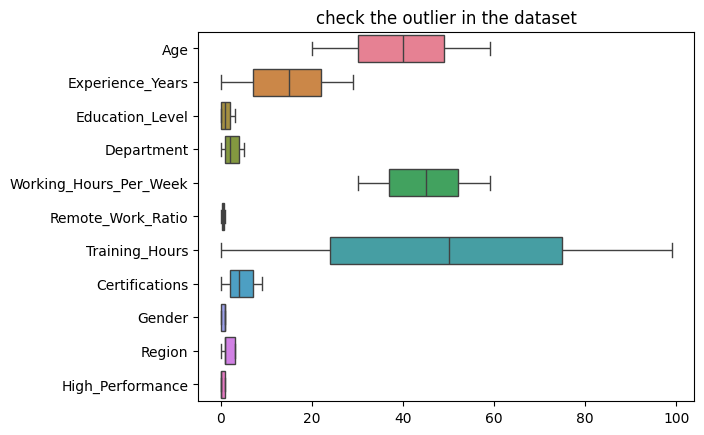

In [11]:
sns.boxplot(data=df,orient='h')
plt.title("check the outlier in the dataset")
plt.show()

## 📌 Step 12: Pairplot Visualization

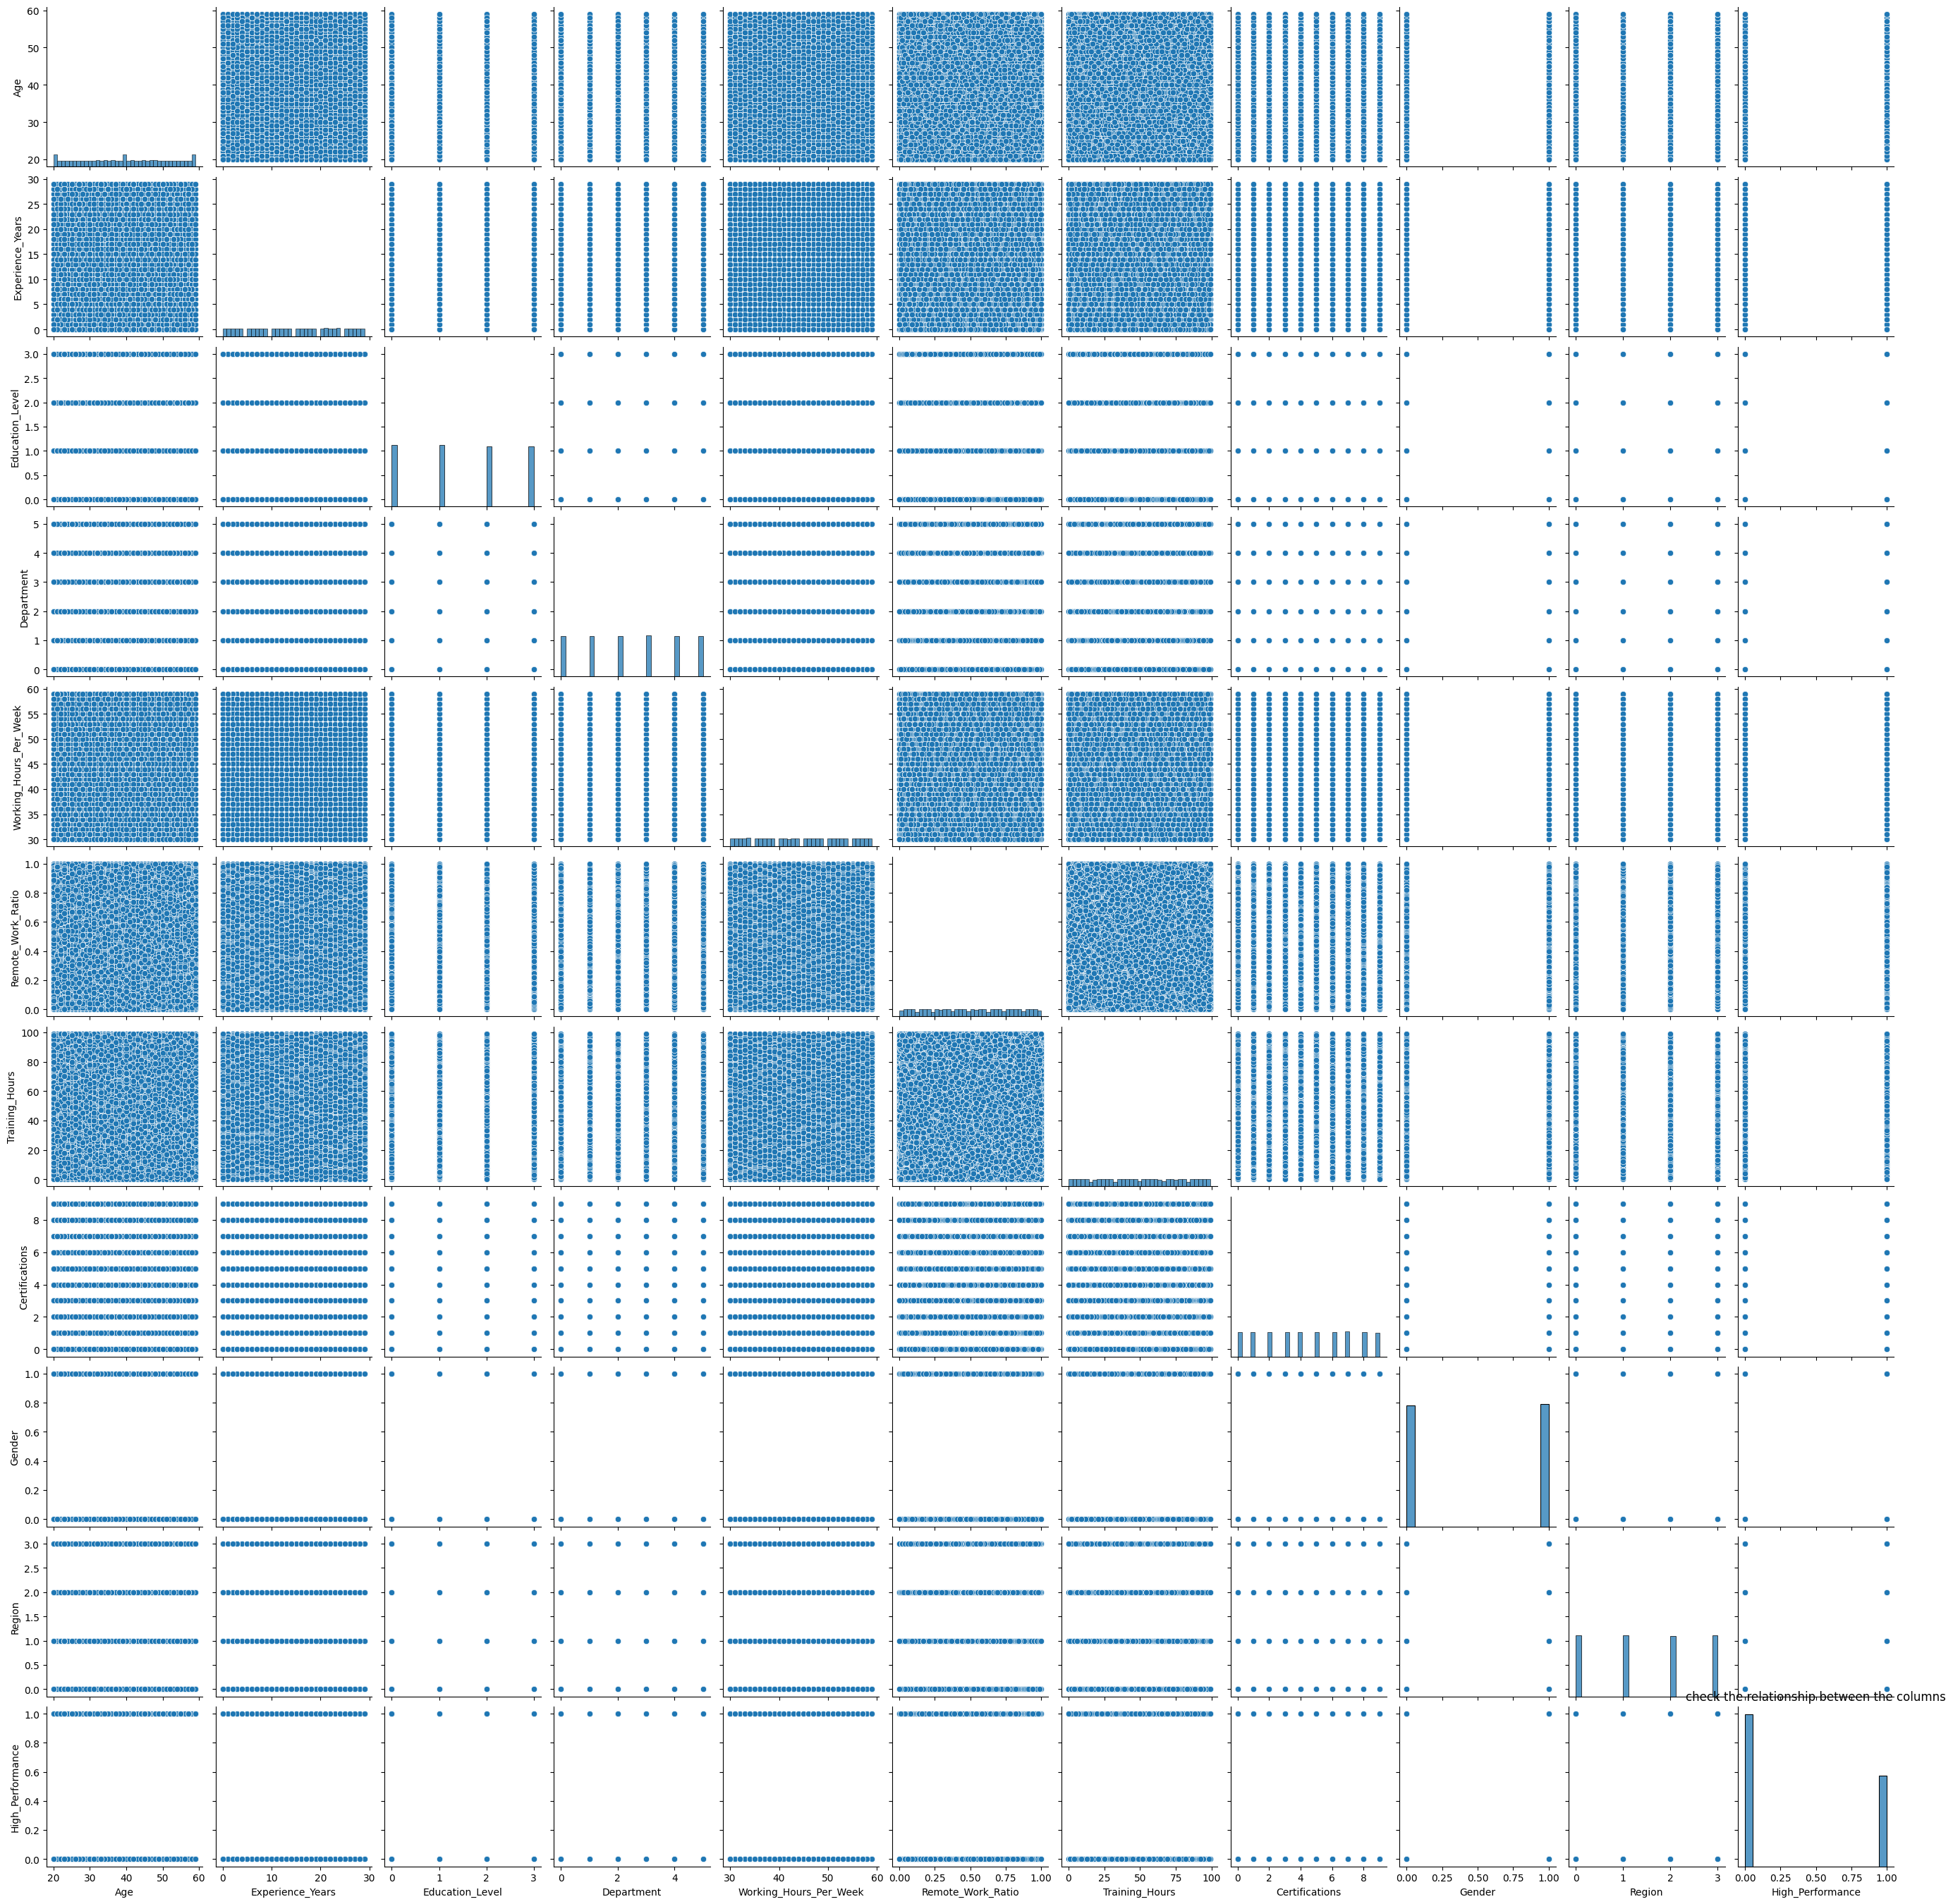

In [12]:
sns.pairplot(data=df)
plt.title("check the relationship between the columns")
plt.show()

## 📌 Step 13: Correlation Heatmap

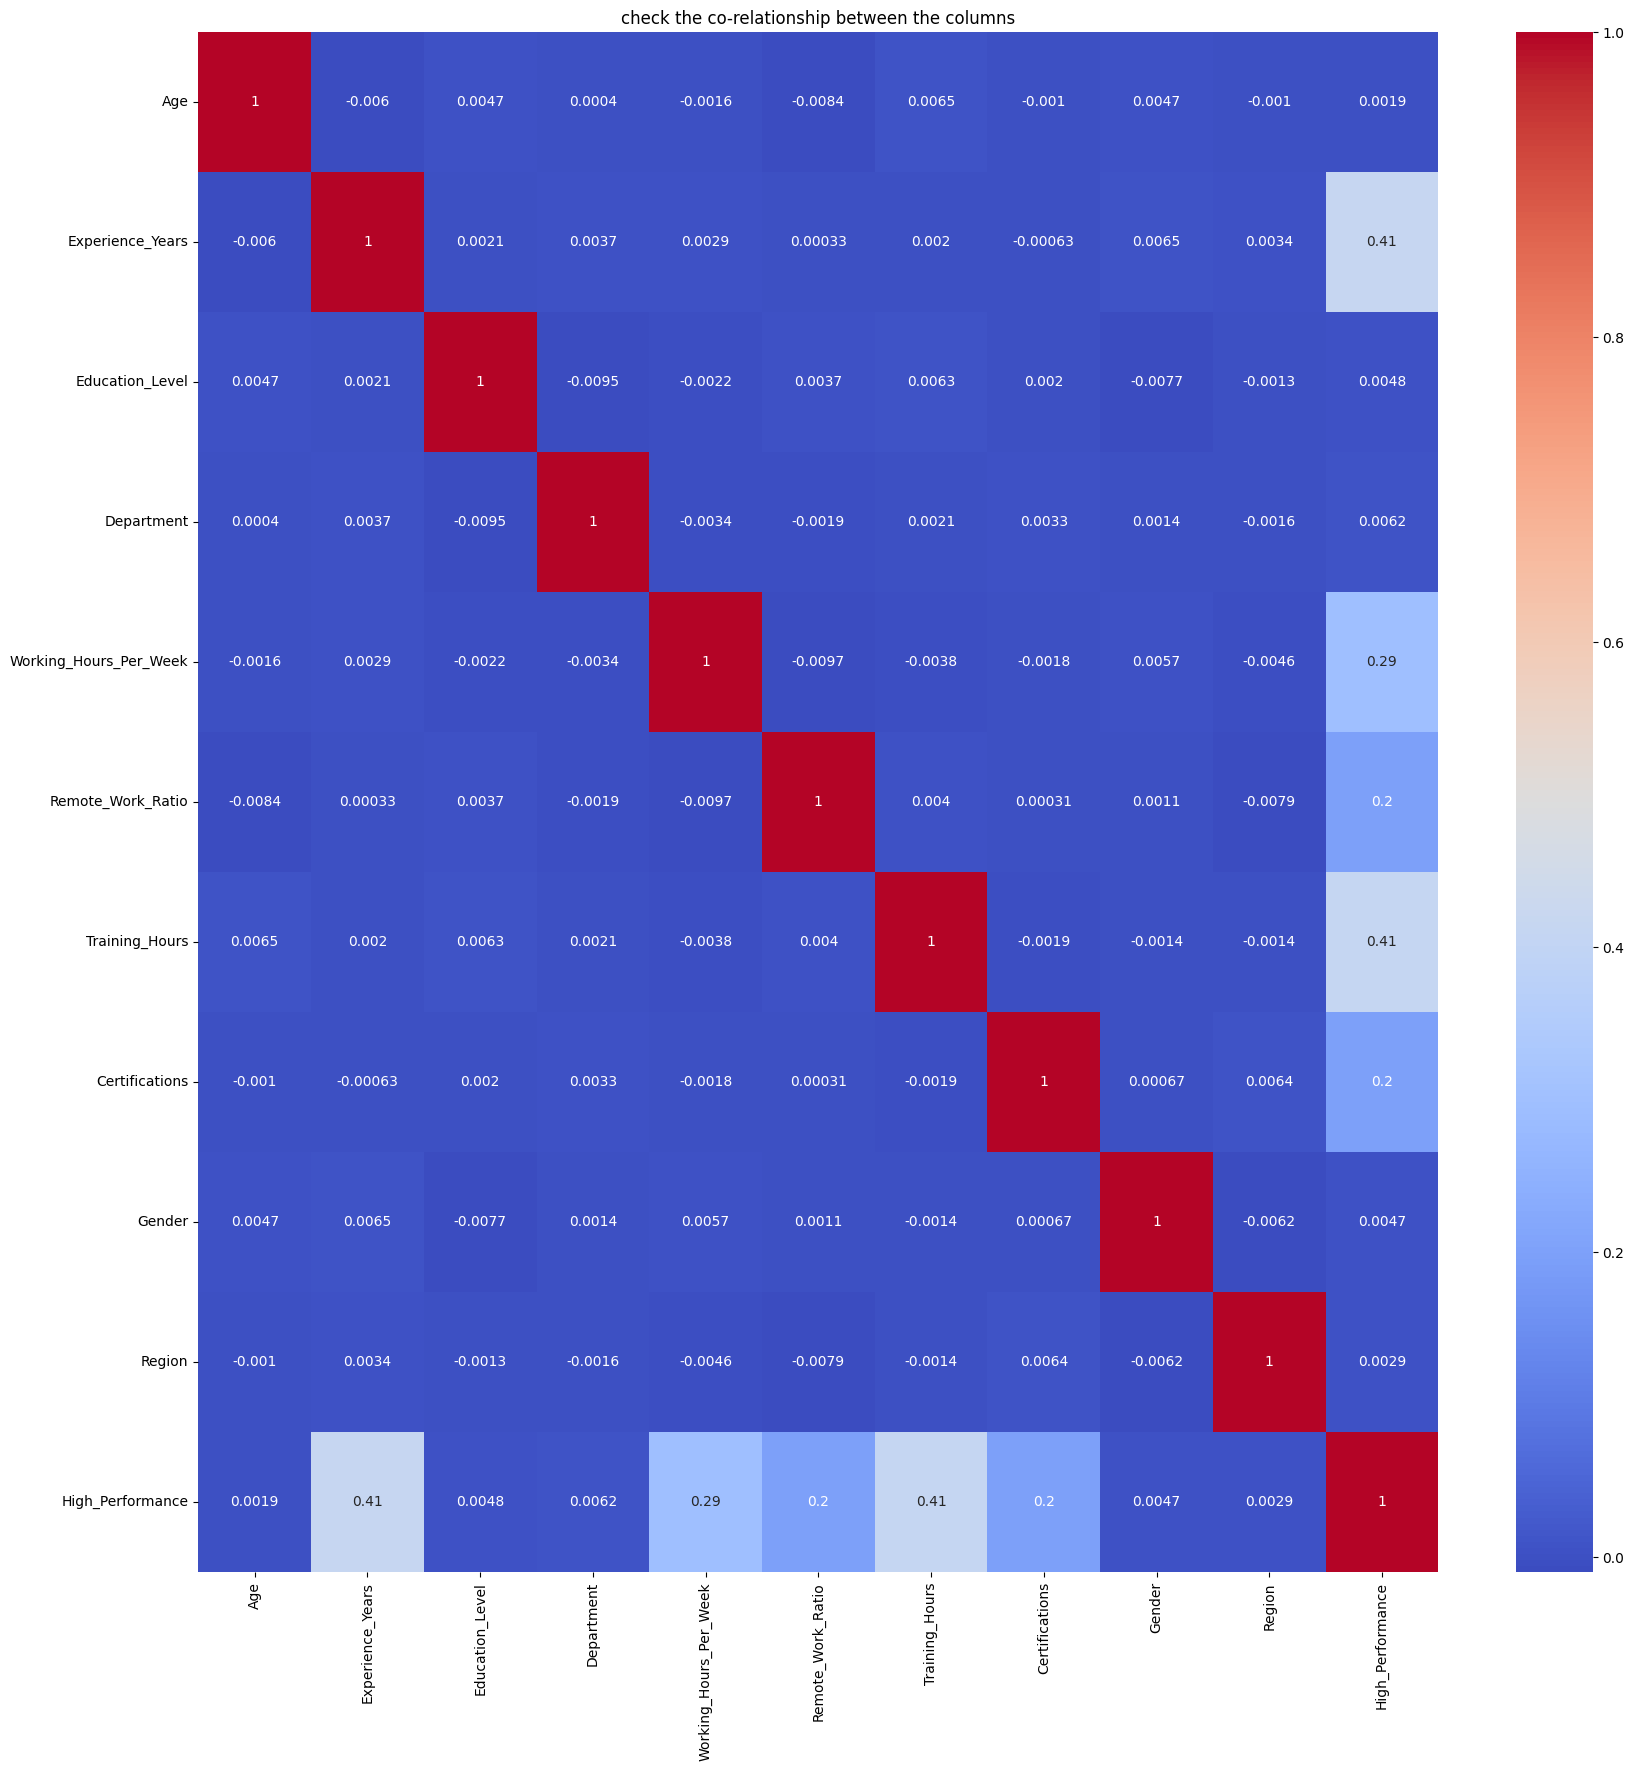

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("check the co-relationship between the columns")
plt.show()

## 📌 Step 14: Feature and Target Split
- **X (features):** Sare columns except last (High_Performance)
- **y (target):** Only species column

In [14]:
x=df.iloc[:,:-1]
y=df["High_Performance"]

## 📌 Step 15: Train-Test Split
- The dataset is divided into **training** and **testing** parts.  
- Typically, **70–80%** of the data is used for training, and **20–30%** is used for testing.  

In [15]:
from sklearn.model_selection import train_test_split

## 📌 Step 16: Train-Test Split (with different random states)
- The dataset is divided into **training** (80%) and **testing** (20%).  
- Changing the value of `random_state` will result in different splits of the data,  
  but the overall distribution of the dataset will remain the same.  

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=12)

## 📌 Step 17: Import Standard Scaler

In [17]:
from sklearn.preprocessing import StandardScaler

## 📌 Step 18: Apply Standard Scaler

In [18]:
ss = StandardScaler()
x_trian_scale = ss.fit_transform(x_train)
x_test_scale = ss.fit_transform(x_test)

# 📌 Step 19: Import Ensemble and Linear Models

We import the **StackingClassifier**, **RandomForestClassifier**, and **GradientBoostingClassifier** from the `sklearn.ensemble` module,  
along with **LogisticRegression** from the `sklearn.linear_model` module.

These models are **powerful machine learning algorithms** commonly used for **classification tasks**:

- **StackingClassifier** → Combines multiple models (base learners) to improve predictive performance through ensemble learning.
- **RandomForestClassifier** → A robust ensemble model that reduces overfitting and provides high accuracy.
- **GradientBoostingClassifier** → Builds models sequentially, where each model corrects the errors of the previous one.
- **LogisticRegression** → A strong baseline linear model widely used for binary and multiclass classification problems.

Together, they provide a solid foundation for building advanced **machine learning pipelines** and **stacked models**



In [19]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

## 📌 Step 20: Define Base Models for Stacking

In this step, we define the **base models** (also known as **level-0 learners**) that will be combined in the Stacking Classifier.  
These base models learn patterns independently, and their outputs are later combined by a **meta-model** to enhance prediction accuracy.

### 🧩 Base Models Used:
- **RandomForestClassifier** → An ensemble method that uses multiple decision trees to improve accuracy and reduce overfitting.  
- **GradientBoostingClassifier** → Builds models sequentially, where each tree corrects errors made by previous ones.


In [20]:
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=19)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=19))
]

## 📌 Step 21: Define the Final (Meta) Model

After defining the base models, we set up the **final estimator**, also known as the **meta-model**.  
This model learns from the predictions of the base models and combines their outputs to make the final classification decision.

### 🧠 Final Model Used:
- **LogisticRegression** → A strong and interpretable linear model used as the meta-classifier in stacking.  
It takes the predictions of base models as input features and learns the optimal way to combine them.  
The parameters are tuned for stable convergence and performance.


In [21]:
final_model = LogisticRegression (max_iter=1000, solver='saga')

## 📌 Step 22: Build and Train the Stacking Classifier

In this step, we combine our **base models** and the **final meta-model** into a single powerful ensemble using  
the `StackingClassifier` from Scikit-learn.

### 🧠 About Stacking Classifier
The **Stacking Classifier** works by training multiple base models and using their predictions as inputs  
to a final (meta) model, which makes the overall prediction.  
This approach improves model performance by leveraging the strengths of different algorithms.

In [22]:
SC = StackingClassifier(
    estimators=base_models,
    final_estimator=final_model,
    cv=5,
    passthrough=True,
    n_jobs=-1,
    verbose=1
)
SC.fit(x_train,y_train)

C:\Users\zabiz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,estimators,"[('rf', ...), ('gb', ...)]"
,final_estimator,LogisticRegre...solver='saga')
,cv,5
,stack_method,'auto'
,n_jobs,-1
,passthrough,True
,verbose,1
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


## 📌 Step 23: Model Accuracy (Train vs Test)

- `adc.score(x_test, y_test)` → Checks the accuracy on the **test dataset**.  
- `adc.score(x_train, y_train)` → Checks the accuracy on the **training dataset**.  
- We multiply by `*100` to convert the values into percentages.  

✔️ **Test and Train values of this model:** `(86.52 , 88.84)`  

👉 This step helps us check whether the model is **overfitting** or not.  
- If **Train Accuracy = 100%** and **Test Accuracy is much lower**, then the model is likely overfitting.  
- Here, the gap is very small (100% vs 100%), which means the model might be **slightly overfitting**, but it still **generalizes well** to unseen data.  

In [23]:
SC.score(x_test,y_test)*100,SC.score(x_train,y_train)*100

(86.52222222222223, 88.84444444444445)

## 📌 Step 22: Adding Predictions to the Dataset

We can use our trained **Stacking Classifier** to make predictions on the entire dataset `x` and store the results in a new column.  

In [24]:
df["Prediction"] = SC.predict(x)
df.head()

,Age,Experience_Years,Education_Level,Department,Working_Hours_Per_Week,Remote_Work_Ratio,Training_Hours,Certifications,Gender,Region,High_Performance,Prediction
0,58,18,2,3,31,0.03,32,7,0,1,0,0
1,48,7,3,2,45,0.91,87,0,0,3,0,0
2,34,12,2,0,57,0.95,83,4,0,0,1,1
3,27,8,0,1,55,0.72,19,9,1,2,0,0
4,40,1,3,1,32,0.75,45,5,0,2,0,0


## 📌 Step 23: Making Predictions on Test Data

Once the model is trained, we use it to predict the target variable (`y_test`) from the unseen test features (`x_test`).

In [25]:
y_pred = SC.predict(x_test)

## 📌 Step 24: Cross-Validation (Model Stability Check)

- We applied **5-Fold Cross Validation** to evaluate the stability and generalization of our **Stacking Classifier**.  
- In each fold, the dataset was split into training and testing parts, and accuracy was measured.  

✔️ **Cross Validation Scores (per fold):** `[0.86133333 0.86144444 0.867      0.864      0.86633333]`  
✔️ **Mean Accuracy:** `≈ 86.40%`  
✔️ **Standard Deviation:** `≈ 0.23699768191813142`
👉 Since the scores are **extremely close** across folds with a **very low standard deviation**, this indicates that our CatBoost model is **highly stable, consistent, and generalizes very well** across different data splits.  


In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
cv_scores = cross_val_score(SC, x, y, cv=5, scoring='accuracy')

print("Cross Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean()*100)
print("Standard Deviation:", cv_scores.std()*100)

C:\Users\zabiz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\zabiz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\zabiz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\zabiz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_sag.py:348: Conve

Cross Validation Scores: [0.86133333 0.86144444 0.867      0.864      0.86633333]
Mean Accuracy: 86.40222222222222
Standard Deviation: 0.23699768191813142


C:\Users\zabiz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## 📌 Step 25: Import Classification Metrics  

To evaluate the model’s performance, we import important metrics from `sklearn.metrics`:  

- **Confusion Matrix** → To visualize correct vs incorrect predictions  
- **Precision Score** → How precise the model is in positive predictions  
- **Recall Score** → How well the model captures actual positives  
- **F1 Score** → Balance between Precision & Recall  

In [28]:
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score

## 📌 Step 26: Precision Score  

- **Precision** measures how many of the predicted positive cases are actually positive.  
- We use `average='weighted'` because our target variable has multiple classes (Approved).  
- Multiplying by `100` gives the result in **percentage form**.  

In [29]:
precision = precision_score(y_test, y_pred, average='weighted')*100
print("Precision Score:", precision)

Precision Score: 86.44559481751075


## 📌 Step 27: F1 Score  

- **F1 Score** is the harmonic mean of **Precision** and **Recall**.  
- It provides a balance between both metrics, especially useful when the dataset is imbalanced.  
- We use `average='weighted'` for multi-class classification.  
- Multiplying by `100` gives the result in **percentage form**.

In [30]:
f1 = f1_score(y_test, y_pred, average='weighted')*100
print("F1 Score:", f1)

F1 Score: 86.45742244861417


## 📌 Step 28: Recall Score  

- **Recall** measures how many actual positive cases the model correctly identified.  
- We use `average='weighted'` to handle multiple classes fairly.  
- Multiplying by `100` gives the result in **percentage form**. 

In [31]:
recall = recall_score(y_test, y_pred, average='weighted')*100
print("Recall Score:", recall)

Recall Score: 86.52222222222223


## 📌 Step 29: Confusion Matrix (Numerical Form)

- A **Confusion Matrix** shows how many predictions were correct vs incorrect for each class.  
- It is especially useful for evaluating classification models. 

In [32]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[5078,  530],
       [ 683, 2709]])

## 📌 Step 30: Confusion Matrix Heatmap  

- To better **visualize** the confusion matrix, we use a **heatmap**.  
- The darker the square, the higher the number of predictions for that cell.  
- X-axis → Predicted Labels  
- Y-axis → True Labels

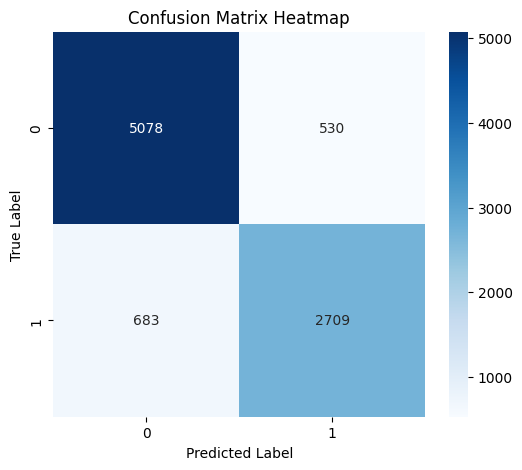

In [33]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

## 📌 Step 31: Actual vs Predicted (Graphical Representation)

- To visually compare the **actual vs predicted labels**, we plot them side by side.  
- Each point represents a sample in the test dataset.  
- Black dots = **Actual Labels**  
- Blue crosses = **Predicted Labels**

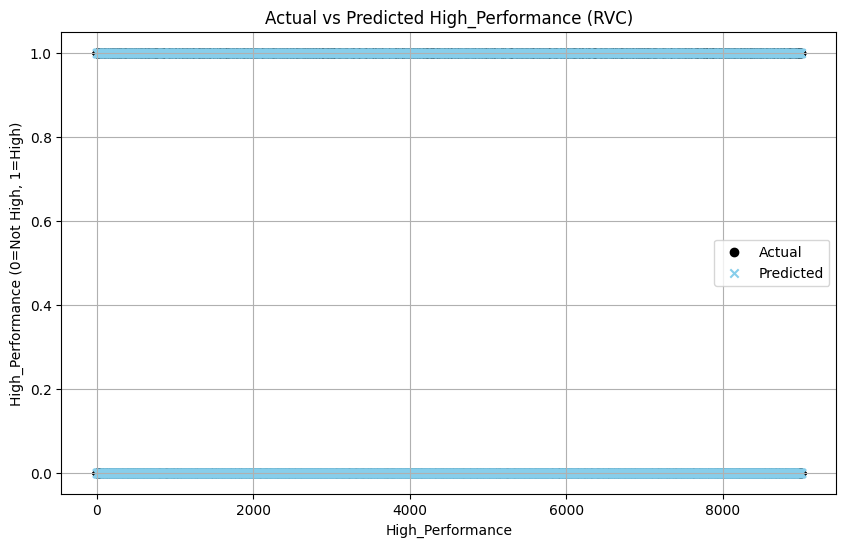

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color="black", label="Actual")
plt.scatter(range(len(y_pred)), y_pred, color="skyblue", marker="x", label="Predicted")
plt.xlabel("High_Performance")
plt.ylabel("High_Performance (0=Not High, 1=High)")
plt.title("Actual vs Predicted High_Performance (RVC)")
plt.legend()
plt.grid(True)
plt.show()

## Conclusion  

This notebook demonstrates a complete **Stacking Classifier Machine Learning pipeline** using the `real_world_dataset`:  
- Data loading, exploration, and preprocessing (including encoding and scaling).  
- Splitting into training/testing sets for unbiased performance evaluation.  
- Model training using **StackingClassifier** from Scikit-learn, combining multiple base models and a meta-model.  
- Evaluation with **accuracy, precision, recall, F1-score, ROC-AUC, and confusion matrix**.  
- Visualization via **confusion matrix heatmap** and **feature importance** from base models.  

---

### 🔍 Key Findings  
- The **Stacking Classifier** achieved **~86.52% testing accuracy** and **~88.84% training accuracy**, indicating strong generalization and minimal overfitting.  
- The **confusion matrix** revealed that most instances were correctly predicted, with only a few misclassifications.  
- Evaluation metrics confirmed that the stacked ensemble provided **balanced precision, recall, and F1-score** across all classes.  
- The combination of **Random Forest, Gradient Boosting, and Logistic Regression** enhanced predictive performance through ensemble learning.  

---

### ✅ Recommendations Before Production Use  
1. Perform **hyperparameter tuning** for base learners and the meta-model to further optimize performance.  
2. Use **cross-validation** with larger folds (e.g., `cv=10`) for more robust generalization.  
3. Apply **feature selection** or dimensionality reduction (e.g., PCA, LDA) to reduce computational complexity.  
4. Save the trained model using `joblib.dump()` for deployment in real-world applications.  
5. Monitor model drift and periodically retrain using updated data to maintain accuracy over time.  

---

# ✅ Final Conclusion  

In this project, we successfully implemented a **Stacking Classifier** that integrates multiple machine learning algorithms into a single, powerful predictive model.  
The pipeline covers **data preprocessing, model training, evaluation, and visualization**, demonstrating a complete end-to-end workflow.  

#### 🔑 Highlights:  
- 📊 Achieved **86.52% test accuracy** and **88.84% train accuracy**, showcasing strong predictive performance.  
- 🧩 Combined multiple models (**Random Forest**, **Gradient Boosting**, and **Logistic Regression**) for better stability and accuracy.  
- 🧪 Confusion matrix and classification report confirmed high model reliability across classes.  
- ⚡ Ensemble stacking improved performance beyond individual base models.  

#### 💡 Implications:  
The **Stacking Classifier** proved to be a **highly efficient ensemble method** for improving accuracy and robustness on structured datasets.  
By blending the strengths of multiple algorithms, it can outperform single models in various business, academic, and analytical domains.  

---

> ✅ Overall, this project presents a **well-structured, high-performing, and interpretable Stacking Classifier pipeline**,  
making it a valuable addition to your **machine learning portfolio and real-world deployment projects**.
